In [1]:
import networkx as nx

import numpy as np
from numpy import random

from tqdm import tqdm

## Grpah Init

In [2]:
line_matrix = [
    "010000120201",
    "100020122002",
    "010110031220",
    "001010232010",
    "000002330000",
    "000010221200",
    "000002020000",
    "000010000001",
    "000000000000",
    "000002000000",
    "010000011201",
    "000003001000",
]
list_matrix = []
for line in line_matrix:
    vec = []
    for a in line:
        vec.append(int(a))
    list_matrix.append(vec)
stud_matrix = np.array(list_matrix)
stud_matrix

array([[0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1],
       [1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2],
       [0, 1, 0, 1, 1, 0, 0, 3, 1, 2, 2, 0],
       [0, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 0],
       [0, 0, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0]])

In [3]:
graph = nx.from_numpy_array(stud_matrix, create_using=nx.DiGraph)
edges = list(graph.edges)
nodes = list(graph.nodes)
print(nx.number_strongly_connected_components(graph))

5


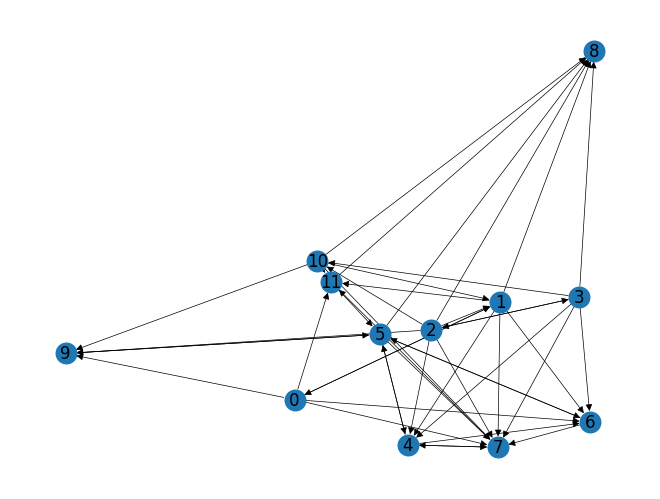

In [4]:
options = {"with_labels": True, "node_size": 250, "linewidths": 0, "width": 0.5}
pos = nx.spring_layout(graph, seed=1969) 
nx.draw(graph, pos, **options)

## Cascade Model

In [5]:
from models.independent_cascade_model import independent_cascade_model

In [6]:
max_weight = 0
for edge in edges:
    weight = graph.edges[edge]['weight']
    if weight > max_weight:
        max_weight = weight

In [7]:
cascade_prob = dict(zip(
    edges,
    [graph.edges[edge]['weight'] / (max_weight + 1) for edge in edges]
))

In [8]:
thresholds_cascades = dict(zip(
    edges,
    random.uniform(0.1, 0.9, graph.number_of_edges()),
))

In [9]:
independent_cascade_model(graph, [0, 1], 5, cascade_prob, thresholds_cascades)

[0, 1, 4, 5, 6, 7, 8, 9, 11]

## Linear Threshold Model

In [10]:
from models.threshold_model import linear_threshold_model

In [11]:
thresholds_thresholds = dict(zip(
    nodes,
    random.uniform(0.1, 0.9, graph.number_of_nodes()),
))

In [12]:
linear_threshold_model(graph, [0, 1], 1, thresholds_thresholds)

[0, 1, 4, 5, 8]

## KKT

In [13]:
from influencers.greedy_kkt import greedy_kkt_influencers

In [14]:
def model(
    graph: nx.DiGraph,
    active_init: list,
    t: int = 10, 
) -> int:
    max_weight = 0
    for edge in edges:
        weight = graph.edges[edge]['weight']
        if weight > max_weight:
            max_weight = weight
    cascade_prob = dict(zip(
        edges,
        [graph.edges[edge]['weight'] / (max_weight + 1) for edge in edges]
    ))
    thresholds_cascades = dict(zip(
        edges,
        random.uniform(0.1, 0.9, graph.number_of_edges()),
    ))
    return independent_cascade_model(graph, active_init, t, cascade_prob, thresholds_cascades)

In [15]:
greedy_kkt_influencers(graph, 2, model, 10, 10)

[3, 10]

## Shapley Influencers

In [16]:
from influencers.shapley_value import shapley_value_influencers

In [17]:
shapley_value_influencers(graph, 2, model, 10, 10, 10)

[10, 3]

## Shapley Communities

In [18]:
from communities.shapley_value import new_communities_shapley

In [20]:
new_communities_shapley(graph, cascade_prob, None, model, 10, 10, 10)

[[3, 2, 5, 6], [0, 10, 9, 7, 8], [1, 11, 4]]

## CSR

In [ ]:
from influencers.csr import csr_influencers

In [ ]:
communities = shapley_value_communities(graph, 2, model, 10, 10, 10)

In [ ]:
csr_influencers(graph, 2, communities)

## New Centrality

In [ ]:
from influencers.new_centrality import new_centrality, new_centrality_influencers
from influencers.new_centrality import new_centrality_upgraded_influencers

In [ ]:
new_centrality_upgraded_influencers(graph, 2, 10)

## Improved cenrality

In [ ]:
from influencers.improved_centrality import imporved_centrality_influencers, improved_centrality

In [ ]:
improved_centrality(graph, cascade_prob)

In [ ]:
imporved_centrality_influencers(graph, 2, cascade_prob)

## kMeans

In [ ]:
from communities.kmeans import kmeans

In [ ]:
kmeans(graph)

## Uber Communities

In [ ]:
from communities.new_communities import new_communities

In [ ]:
new_communities(graph, cascade_prob)

## Some Shit